## 0. Preliminary
- 강의의 초점 : 생각을 코드로 바꾸는 기술
- 이론 x
- 코드나 옵션에 대해서 x

- 옵션을 다 외울수도 없고, 모델 함수도 아 외울수 없다 -> document와 자동완성에 익숙 해져야 함
- 아래 내용들은 ds2 최근 기출에 해답에 나와있던 method들 및 개인적으로 많이 쓰는 것 위주로 준비함

**(참고) About netfilx_imdb file**

> The file Netflix TV Shows and Movies.csv contains comprehensive information about various titles available on Netflix, including their titles, release years, runtime, IMDB scores, and IMDB votes
    
- title: The name of a TV show or movie. (Text)
- type: Indicates whether an entry is a TV show or a movie. (Text)
- description: A brief summary or description of a TV show or movie. (Text)
- release_year: The year in which a TV show or movie was released. (Numeric)
- age_certification: The age certification rating for a TV show or movie. (Text)
- runtime: The length of an episode for TV shows or duration of a movie. (Text)
- imdb_score: The score given by users on IMDB for a particular title. (Numeric)
- imdb_votes: The number of votes received by each title on IMDB. (Numeric)

**(참고2) imdb voting**
![](https://m.media-amazon.com/images/G/01/imdbpro/help/help_site_content/GD9UAYG9EUUERMUH/vote_change_del_low_quality.gif)

## 1. 데이터 불러오기

- 보통 많이 보게되는 데이터 파일의 확장자는 csv, tsv, json, jsonl
- pd.read_csv, pd.read_json 와 옵션들을 사용해서 읽어옴
- 가끔 글자가 깨지는 경우, encoding 옵션도 필요할 때가 있음
- txt, pickle, parquet을 다음으로 많이 사용
- txt는 open을 이용함

In [1]:
import numpy as np
import pandas as pd

In [2]:
path_file_csv = "./data/netflix_imdb.csv"
path_file_jsonl = "./data/netflix_imdb.jsonl"

In [3]:
df = pd.read_csv(path_file_csv)

In [4]:
df = pd.read_csv(path_file_csv, sep = ",")

In [5]:
df = pd.read_json(path_file_jsonl, lines = True)

## 2. 데이터 살펴보기

### 샘플링 : head, tail, sample
- 개인적으로는 보통 jupyter에서 df print 하는 방식을 선호함. shape, head, tail, index를 한번에 확인 가능
- tail과 sample은 가끔 특정 상황에 사용함

In [6]:
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,None,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,None,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,None,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,None,116,tt10168094,6.2,9.0


In [7]:
df.head(1)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0


In [8]:
df.tail(1) # 시계열 데이터 일 때

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5282,5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,None,0,tt13711094,8.8,16.0


In [9]:
df.sample(2) # 임의값 확인 차

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1017,1017,tm151210,Jim Gaffigan: Obsessed,MOVIE,Jim Gaffigan bursts back on the scene with thi...,2014,None,70,tt3481550,7.6,2226.0
2719,2719,tm428483,The Girl Allergic to Wi-Fi,MOVIE,"Norma, a typical teenager who is always online...",2018,None,104,tt7619554,6.3,290.0


### 요약하기 1: shape, info, summary
- 데이터의 전반적인 구성 확인

In [10]:
df.shape

(5283, 11)

In [11]:
df.info()
# null check 용
# 5283 이 아닌 description, age_certification, imdb_votes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [12]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [13]:
# imdb_score 의 분포를 더 살펴보자
df.describe(percentiles = [i/10 for i in range(10)])

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
0%,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
10%,528.200000,2009.000000,25.000000,5.100000,1.250000e+02
20%,1056.400000,2014.000000,42.000000,5.600000,3.510000e+02
30%,1584.600000,2016.000000,51.000000,6.100000,7.098000e+02
40%,2112.800000,2017.000000,66.000000,6.400000,1.305000e+03
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03


<Axes: >

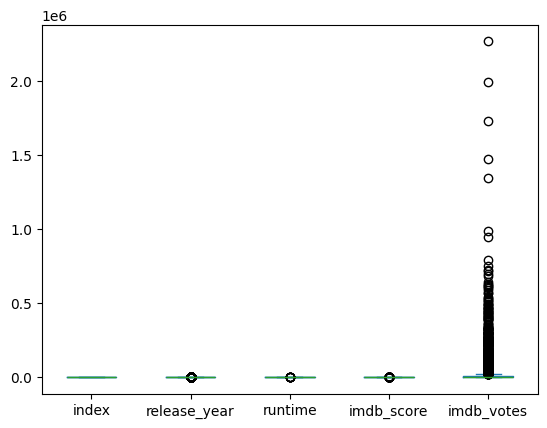

In [14]:
# 변수형 더 살펴보기
df.plot.box()

<Axes: >

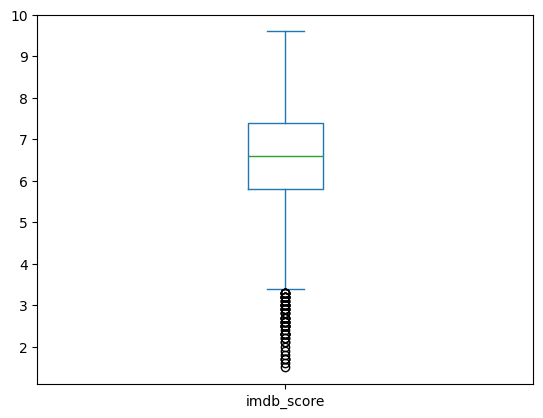

In [15]:
# imdb_score만 따로 보기
df['imdb_score'].plot.box()

### 요약하기 2: unique, nunique, value_counts
- 범주형 변수

In [16]:
df['type']

0       MOVIE
1       MOVIE
2       MOVIE
3       MOVIE
4        SHOW
        ...  
5278    MOVIE
5279    MOVIE
5280    MOVIE
5281    MOVIE
5282     SHOW
Name: type, Length: 5283, dtype: object

In [17]:
# 진짜 movie, show 만 있을까?
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [18]:
df['age_certification']

0           R
1          PG
2           R
3           R
4       TV-14
        ...  
5278     None
5279     None
5280     None
5281     None
5282     None
Name: age_certification, Length: 5283, dtype: object

In [19]:
# 뭐가 많네?
# Na 있었지 얼마나?
df['age_certification'].value_counts(dropna = False)

age_certification
None     2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: count, dtype: int64

In [20]:
df['age_certification'].nunique(dropna = False)

12

**시각화가 빠진 이유**
- DS2 기출 기준으로는 시각화를 공부하야 할 이유가 없다고 봄.
- 시각화의 주 목적은 목표에 대한 데이터 연관성 및 모델링에 필요한 의사결정용. 하지만, ds2 과정은 주어진 과정에 대한 코드 실행력을 확인하는 과정이라 시각화는 필요 없다고 봄.
- DS3 는 필요할 수도 있겠지만, 시간이 있을지..

## 3. 데이터 조작하기

### 데이터 subset : column, loc, iloc, query, sort_values, set_index, reset_index

In [21]:
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [22]:
df[['id','title','type','release_year','age_certification','runtime','imdb_score','imdb_votes']]

,id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,tm84618,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...
5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,None,108,5.8,26.0
5279,tm1014599,Fine Wine,MOVIE,2021,None,100,6.9,39.0
5280,tm1045018,Clash,MOVIE,2021,None,88,6.5,32.0
5281,tm1098060,Shadow Parties,MOVIE,2021,None,116,6.2,9.0


In [23]:
# column list가 너무 길면?
df.drop(columns = ['index','description','imdb_id'])

,id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,tm84618,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...
5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,2021,None,108,5.8,26.0
5279,tm1014599,Fine Wine,MOVIE,2021,None,100,6.9,39.0
5280,tm1045018,Clash,MOVIE,2021,None,88,6.5,32.0
5281,tm1098060,Shadow Parties,MOVIE,2021,None,116,6.2,9.0


In [24]:
selected_features = ['imdb_id','title','type','release_year','age_certification','runtime','imdb_score','imdb_votes']
df_filtered = df[selected_features].copy() # 원본 방지 용도
df_filtered

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,tt0075314,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,tt0071853,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,tt0079470,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,tt0070047,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,tt0063929,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...
5278,tt14412240,Momshies! Your Soul is Mine,MOVIE,2021,None,108,5.8,26.0
5279,tt13857480,Fine Wine,MOVIE,2021,None,100,6.9,39.0
5280,tt14620732,Clash,MOVIE,2021,None,88,6.5,32.0
5281,tt10168094,Shadow Parties,MOVIE,2021,None,116,6.2,9.0


In [25]:
df.iloc[3,:]
# df.iloc[3:4,:]
# df.iloc[3,'description']

index                                                                3
id                                                            tm190788
title                                                     The Exorcist
type                                                             MOVIE
description          12-year-old Regan MacNeil begins to adapt an e...
release_year                                                      1973
age_certification                                                    R
runtime                                                            133
imdb_id                                                      tt0070047
imdb_score                                                         8.1
imdb_votes                                                    391942.0
Name: 3, dtype: object

In [26]:
# column 도 같이 선택해서 보고 싶다
df.loc[3,'description']
# df.iloc[3,4] # iloc도 가능은 함

'12-year-old Regan MacNeil begins to adapt an explicit new personality as strange events befall the local area of Georgetown. Her mother becomes torn between science and superstition in a desperate bid to save her daughter, and ultimately turns to her last hope: Father Damien Karras, a troubled priest who is struggling with his own faith.'

In [27]:
# imdb_id 값은 아는데, 이것을 찾고 싶어!
# 데이터 자체에 key 값이 있고, 이를 사용하고자 할 때

df.set_index('imdb_id')
# df.set_index('imdb_id').loc[['tt5182866']]
# df.set_index('imdb_id').loc['tt5182866','description']
# df.set_index('imdb_id').loc[['tt5182866'],'description':]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
imdb_id,,,,,,,,,,
tt0075314,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
tt0071853,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
tt0079470,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
tt0070047,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
tt0063929,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...
tt14412240,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,None,108,5.8,26.0
tt13857480,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,None,100,6.9,39.0
tt14620732,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,None,88,6.5,32.0


In [28]:
# 데이터가 전처리를 하고 났더니 index가 많이 바뀜

df.drop([1,2]).reset_index()
# df.set_index('imdb_id').reset_index()
# df.set_index('imdb_id').reset_index(drop = True) #reset 시킨 index를 추가 안하고 싶을 때

,level_0,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
2,4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
3,5,5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
4,6,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5276,5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,None,108,tt14412240,5.8,26.0
5277,5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,None,100,tt13857480,6.9,39.0
5278,5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,None,88,tt14620732,6.5,32.0
5279,5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,None,116,tt10168094,6.2,9.0


In [29]:
# 뭐 다 모르는 영화들이네, 아는 것 위주로 보고싶은데

df.sort_values('imdb_score')
# df.sort_values('imdb_score',ascending = False)
# df.sort_values('imdb_score',ascending = False).head(20)
# df.sort_values('imdb_votes',ascending = False).head(20)
# df.sort_values(['imdb_score','release_year'], ascending=False).head(20)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1664,1664,tm549892,Aerials,MOVIE,Earth is invaded by Aliens from outer space. A...,2016,None,90,tt5314138,1.5,382.0
4648,4648,ts319303,He's Expecting,SHOW,When a successful ad executive who's got it al...,2022,TV-PG,26,tt14719276,1.6,2735.0
1101,1101,tm171891,Himmatwala,MOVIE,When a temple priest commits suicide after bei...,2013,None,150,tt2802286,1.7,8550.0
3355,3355,tm839411,Me Against You: Mr. S's Vendetta,MOVIE,A young couple who makes popular YouTube video...,2020,None,64,tt11559652,1.7,362.0
4782,4782,ts280693,Thomas & Friends: All Engines Go!,SHOW,"In a reboot of the classic TV series, a younge...",2021,TV-Y,11,tt14556544,1.7,509.0
...,...,...,...,...,...,...,...,...,...,...,...
3597,3597,ts90621,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,tt9432978,9.3,66985.0
3144,3144,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,tt9253866,9.3,41386.0
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
622,622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.6,3046.0


In [30]:
# 최신 영화만 보고 싶은데?

df[df['type'] == 'MOVIE']
# df[df['type'] != 'SHOW']
# df[(df['type'] == 'MOVIE') & (df['release_year']>2021)]
# df[(df['type'] == 'MOVIE') & (df['release_year']>2021) & (~df['age_certification'].isna())]
# df[(df['type'] == 'MOVIE') & (df['release_year']>2021) & (~df['age_certification'].isna()) & (df['imdb_score'] > df['imdb_score'].median())]

# df[df['release_year'].isin([2020,2021,2022])]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
5,5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
...,...,...,...,...,...,...,...,...,...,...,...
5277,5277,tm1004011,Time to Dance,MOVIE,When a ballroom dancerâ€™s shot at a crucial t...,2021,None,107,tt8622232,2.2,950.0
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,None,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,None,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,None,88,tt14620732,6.5,32.0


In [31]:
# 통합 정리
# 2022년 작 중, runtime 50분 넘는 SHOW 중에 imdb_votes top5 볼 수 있는 selected_features 의 sub-df를 복사

df[(df['type'] == 'SHOW') & (df['release_year']>2021) & (df['runtime']>50)].sort_values('imdb_votes', ascending = False)[selected_features].copy().head(5)

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
4417,tt8740976,Inventing Anna,SHOW,2022,TV-MA,68,6.8,54105.0
4442,tt13365348,Archive 81,SHOW,2022,TV-MA,54,7.3,43068.0
4466,tt14169960,All of Us Are Dead,SHOW,2022,TV-MA,61,7.5,41393.0
4428,tt11311302,Vikings: Valhalla,SHOW,2022,TV-MA,51,7.1,31330.0
4421,tt9170236,Pieces of Her,SHOW,2022,TV-MA,52,6.4,11322.0


### 데이터 조합 : new_column, merge, concat

<Axes: ylabel='Frequency'>

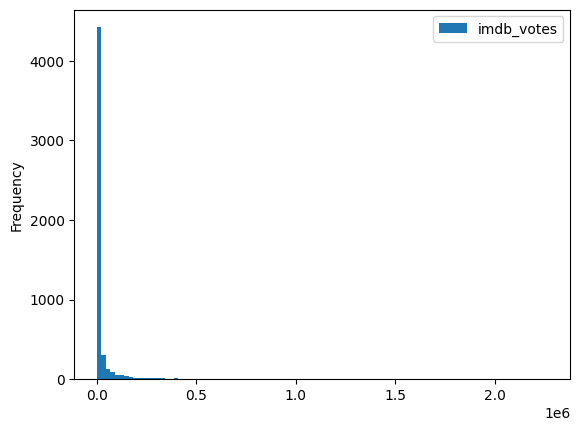

In [32]:
df[['imdb_votes']].plot.hist(bins = 100)

In [33]:
# score랑 votes 변경하면 어떻게 되나?

df['imdb_score'] * 10
np.log(df['imdb_votes'])

# df['imdb_score'].transform(lambda x : x*10)
# df['imdb_votes'].transform(np.log)
# df['imdb_votes'].transform(np.log).plot.hist(bins = 100)

# df['imdb_votes_log'] = df['imdb_votes'].transform(np.log)

0       13.586377
1       13.182286
2       12.880085
3       12.878869
4       11.196775
          ...    
5278     3.258097
5279     3.663562
5280     3.465736
5281     2.197225
5282     2.772589
Name: imdb_votes, Length: 5283, dtype: float64

In [34]:
# df 생성

df1 = pd.DataFrame({'a': range(5), 
                    'b':range(6,11)})
df1
df2 = pd.DataFrame([{'a':5, 'b':11}, 
                    {'a':6, 'b':12}])
df2

df4 = pd.DataFrame([{"a":a_v, "c":c_v} for a_v, c_v in zip(range(7), 'abcdefg')])
df4

,a,c
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e
5,5,f
6,6,g


In [35]:
# 행 추가하기
df3 = pd.concat([df1, df2])
df3

# pd.merge(df3, df4, how = 'inner', on = 'a')

,a,b
0,0,6
1,1,7
2,2,8
3,3,9
4,4,10
0,5,11
1,6,12


In [36]:
# 열 추가하기

df3_1 = df3.drop(0).copy()
df4_1 = df4.drop(len(df4)-1).copy()

# pd.merge(df3_1, df4_1, how = 'inner', on = 'a')

# df3_1 = df3.reset_index(drop = True).drop(0).copy()
# pd.merge(df3_1, df4_1, how = 'inner', on = 'a')
# pd.merge(df3_1, df4_1, how = 'left', on = 'a')
# pd.merge(df3_1, df4_1, how = 'right', on = 'a')
# pd.merge(df3_1, df4_1, how = 'outer', on = 'a')


### 데이터 전처리 : isna, duplicated, get_dummies, scaler

In [37]:
df_filtered = df[selected_features].copy()
df_filtered

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,tt0075314,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,tt0071853,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,tt0079470,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,tt0070047,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,tt0063929,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...,...
5278,tt14412240,Momshies! Your Soul is Mine,MOVIE,2021,None,108,5.8,26.0
5279,tt13857480,Fine Wine,MOVIE,2021,None,100,6.9,39.0
5280,tt14620732,Clash,MOVIE,2021,None,88,6.5,32.0
5281,tt10168094,Shadow Parties,MOVIE,2021,None,116,6.2,9.0


In [38]:
# na 가 있었는데..?
df_filtered.info()

# df_filtered.dropna(how = 'any')
# df_filtered.dropna(how = 'any').reset_index(drop = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   imdb_id            5283 non-null   object 
 1   title              5283 non-null   object 
 2   type               5283 non-null   object 
 3   release_year       5283 non-null   int64  
 4   age_certification  2998 non-null   object 
 5   runtime            5283 non-null   int64  
 6   imdb_score         5283 non-null   float64
 7   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 330.3+ KB


In [39]:
# 문제의 친구들을 확인해보자

df_filtered['age_certification'].isna().sum()
df_filtered[df_filtered['imdb_votes'].isna()]

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
918,tt3766424,Jackass Presents: Bad Grandpa .5,MOVIE,2014,PG-13,86,6.3,NaN
1111,tt3289618,Xenos,MOVIE,2013,None,12,7.8,NaN
2669,tt7466040,The Crossing,MOVIE,2017,None,10,7.5,NaN
3468,tt10326928,A Cinderella Story: Christmas Wish,MOVIE,2019,PG,93,5.3,NaN
3796,tt10767720,Jarhead: Law of Return,MOVIE,2019,R,103,5.6,NaN
3946,tt10804786,Welcome to Sudden Death,MOVIE,2020,R,80,4.3,NaN
4020,tt13079112,The Lockdown Plan,MOVIE,2020,None,49,6.5,NaN
4257,tt13322484,Cops and Robbers,MOVIE,2020,PG-13,8,6.9,NaN
4328,tt10545994,In Vitro,MOVIE,2019,None,27,7.7,NaN
4681,tt12771540,Audible,MOVIE,2021,PG-13,39,5.3,NaN


In [40]:
# 설마 같은 title이 있을까? 설마?
df_filtered[df_filtered['title'].duplicated(keep = False)].sort_values('title')

# 설마 없는 게 있을까?
# df[df['title'] == '']

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
50,tt0087800,A Nightmare on Elm Street,MOVIE,1984,R,91,7.4,230543.0
338,tt1179056,A Nightmare on Elm Street,MOVIE,2010,R,95,5.2,99192.0
771,tt2150139,A Second Chance,MOVIE,2011,None,90,4.7,1018.0
1639,tt5226380,A Second Chance,MOVIE,2015,None,130,8.6,47.0
3088,tt7374948,Always Be My Maybe,MOVIE,2019,PG-13,101,6.8,54166.0
...,...,...,...,...,...,...,...,...
672,tt1291584,Warrior,MOVIE,2011,PG-13,140,8.2,463276.0
4979,tt10619486,Zero,SHOW,2021,TV-MA,24,5.6,1270.0
2154,tt6527426,Zero,MOVIE,2018,None,152,5.2,27208.0
2587,tt6149820,Zoo,MOVIE,2018,None,100,5.7,96.0


In [41]:
# age_certification은 제외
df_filtered = df_filtered[~df_filtered['age_certification'].isna()].copy()

# imdb_votes 는 median으로 대체
df_filtered.loc[df_filtered['imdb_votes'].isna(),'imdb_votes'] = df_filtered['imdb_votes'].median()

# title 중복은 아래 것만 남기자
df_filtered = df_filtered.drop_duplicates(subset = ['title'], keep = 'last')

In [42]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2981 entries, 0 to 5275
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   imdb_id            2981 non-null   object 
 1   title              2981 non-null   object 
 2   type               2981 non-null   object 
 3   release_year       2981 non-null   int64  
 4   age_certification  2981 non-null   object 
 5   runtime            2981 non-null   int64  
 6   imdb_score         2981 non-null   float64
 7   imdb_votes         2981 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 209.6+ KB


In [43]:
# dummy 변환
type_dummy = pd.get_dummies(df_filtered[['type']], drop_first=True).astype(int)
type_dummy

df_filtered = pd.concat([df_filtered, type_dummy], axis = 1)
df_filtered

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes,type_SHOW
0,tt0075314,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0,0
1,tt0071853,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0,0
2,tt0079470,Life of Brian,MOVIE,1979,R,94,8.0,392419.0,0
3,tt0070047,The Exorcist,MOVIE,1973,R,133,8.1,391942.0,0
4,tt0063929,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0,1
...,...,...,...,...,...,...,...,...,...
5252,tt15340790,Christmas Flow,SHOW,2021,TV-MA,50,5.8,702.0,1
5254,tt15772846,Korean Cold Noodle Rhapsody,SHOW,2021,TV-PG,49,7.3,15.0,1
5257,tt11213372,Stuck Apart,MOVIE,2021,R,96,6.0,10418.0,0
5266,tt13879000,Pitta Kathalu,SHOW,2021,TV-MA,37,5.1,727.0,1


In [44]:
# scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
# StandardScaler
# z = (x - u) / s
scaler1 = StandardScaler()
imdb_votes_scaled1 = scaler1.fit_transform(df_filtered[['imdb_votes']])
imdb_votes_scaled1
# (df_filtered['imdb_votes'] - df_filtered['imdb_votes'].mean()) / df_filtered['imdb_votes'].std()

array([[ 6.76985294],
       [ 4.40953468],
       [ 3.17325276],
       ...,
       [-0.23760779],
       [-0.32413806],
       [-0.32770963]])

In [46]:
# MinMaxScaler
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
scaler2 = MinMaxScaler()
imdb_votes_scaled2 = scaler2.fit_transform(df_filtered[['imdb_votes']])
imdb_votes_scaled2

array([[3.50581034e-01],
       [2.34041343e-01],
       [1.73000459e-01],
       ...,
       [4.59069702e-03],
       [3.18302434e-04],
       [1.41957595e-04]])

### 데이터 조작 1 : apply

In [47]:
# 오징어 게임을 찾아보자
df_filtered[df_filtered.apply(lambda x : 'Game' in x['title'], axis = 1)]

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes,type_SHOW
350,tt0281491,Still Game,SHOW,2002,TV-14,29,8.9,7539.0,1
389,tt10020984,The Game,SHOW,2006,TV-14,22,6.6,4417.0,1
682,tt1515091,Sherlock Holmes: A Game of Shadows,MOVIE,2011,PG-13,129,7.4,446531.0,0
793,tt1772872,Game,MOVIE,2011,PG,135,5.2,2316.0,0
870,tt2084970,The Imitation Game,MOVIE,2014,PG-13,113,8.0,748654.0,0
973,tt2466830,The Short Game,MOVIE,2013,PG,100,7.3,1518.0,0
1532,tt8879588,Mind Game,SHOW,2015,TV-14,44,7.5,12.0,1
1728,tt4209788,Molly's Game,MOVIE,2017,R,140,7.4,165817.0,0
1959,tt3317234,"Game Over, Man!",MOVIE,2018,R,100,5.4,29773.0,0
2112,tt10810630,Sacred Games,SHOW,2018,TV-MA,50,8.6,85088.0,1


In [48]:
# release_year 년대로 묶으면 어떨까?
def convert_year(yr):
    if yr < 1970:
        return '60s'
    elif yr < 1980:
        return '70s'
    elif yr < 1990:
        return '80s'
    elif yr < 2000:
        return '90s'
    elif yr < 2010:
        return '00s'
    elif yr < 2020:
        return '2010s'
    else:
        return '2020s'

df_filtered['release_year_cate'] = df_filtered['release_year'].apply(convert_year)

### 데이터 조작 2 : groupby

In [49]:
# 과거 작품이 명작이지?

df_filtered.groupby('release_year').agg({'imdb_score':'median'})

,imdb_score
release_year,
1964,7.80
1966,7.30
1967,7.70
1969,8.80
1971,7.70
1972,7.15
1973,8.10
1975,8.20
1976,8.30


<Axes: xlabel='release_year', ylabel='imdb_score'>

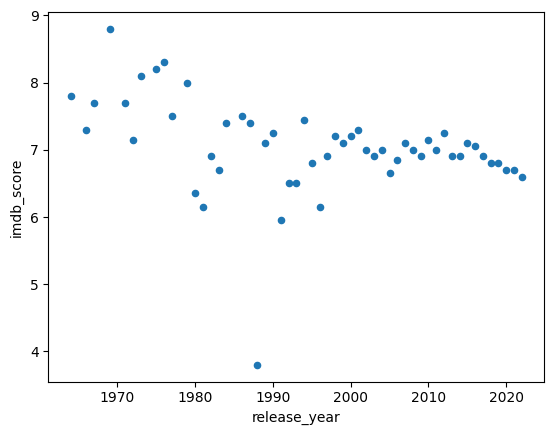

In [50]:
df_filtered.groupby('release_year').agg({'imdb_score':'median'}).reset_index().plot.scatter(x = 'release_year', y = 'imdb_score')

In [51]:
# 등급이 영화, show 마다 다른 구조인가?
df_filtered.groupby(['type','age_certification']).count()

imdb_id  title  release_year  runtime  imdb_score  \
type  age_certification                                                      
MOVIE G                      105    105           105      105         105   
      NC-17                   13     13            13       13          13   
      PG                     237    237           237      237         237   
      PG-13                  422    422           422      422         422   
      R                      538    538           538      538         538   
SHOW  TV-14                  433    433           433      433         433   
      TV-G                    72     72            72       72          72   
      TV-MA                  791    791           791      791         791   
      TV-PG                  172    172           172      172         172   
      TV-Y                    94     94            94       94          94   
      TV-Y7                  104    104           104      104         104   

                         imdb_votes  type_SHOW  release_year_cate  
type  age_certification                                            
MOVIE G                         105        105                105  
      NC-17                      13         13                 13  
      PG                        237        237                237  
      PG-13                     422        422                422  
      R                         538        538                538  
SHOW  TV-14                     433        433                433  
      TV-G                       72         72                 72  
      TV-MA                     791        791                791  
      TV-PG                     172        172                172  
      TV-Y                       94         94                 94  
      TV-Y7                     104        104                104

In [52]:
df_filtered.groupby(['type','age_certification']).count()

imdb_id  title  release_year  runtime  imdb_score  \
type  age_certification                                                      
MOVIE G                      105    105           105      105         105   
      NC-17                   13     13            13       13          13   
      PG                     237    237           237      237         237   
      PG-13                  422    422           422      422         422   
      R                      538    538           538      538         538   
SHOW  TV-14                  433    433           433      433         433   
      TV-G                    72     72            72       72          72   
      TV-MA                  791    791           791      791         791   
      TV-PG                  172    172           172      172         172   
      TV-Y                    94     94            94       94          94   
      TV-Y7                  104    104           104      104         104   

                         imdb_votes  type_SHOW  release_year_cate  
type  age_certification                                            
MOVIE G                         105        105                105  
      NC-17                      13         13                 13  
      PG                        237        237                237  
      PG-13                     422        422                422  
      R                         538        538                538  
SHOW  TV-14                     433        433                433  
      TV-G                       72         72                 72  
      TV-MA                     791        791                791  
      TV-PG                     172        172                172  
      TV-Y                       94         94                 94  
      TV-Y7                     104        104                104

### etc.

In [53]:
# numpy, list 변환

df_filtered[['imdb_score','imdb_votes']].to_numpy()
# df_filtered['imdb_score'].tolist()

array([[8.30000e+00, 7.95222e+05],
       [8.20000e+00, 5.30877e+05],
       [8.00000e+00, 3.92419e+05],
       ...,
       [6.00000e+00, 1.04180e+04],
       [5.10000e+00, 7.27000e+02],
       [4.60000e+00, 3.27000e+02]])

In [54]:
# pandas shift

df_filtered['imdb_score']
# df_filtered['imdb_score'].shift(-1)

0       8.3
1       8.2
2       8.0
3       8.1
4       8.8
       ... 
5252    5.8
5254    7.3
5257    6.0
5266    5.1
5275    4.6
Name: imdb_score, Length: 2981, dtype: float64

In [55]:
# corr

df_filtered[['imdb_score','imdb_votes']].corr()
df_filtered[['imdb_score','imdb_votes']].corr(method='spearman')

,imdb_score,imdb_votes
imdb_score,1.000000,0.180729
imdb_votes,0.180729,1.000000


## 4. 데이터 모델링

In [56]:
df_model = df_filtered[df_filtered['type'] == 'MOVIE'].reset_index(drop = True).copy()

In [57]:
df_model = pd.concat([df_model, pd.get_dummies(df_model[['age_certification','release_year_cate']], drop_first=True).astype(int)], axis = 1)

In [58]:
df_model.head(1)

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes,type_SHOW,release_year_cate,age_certification_NC-17,age_certification_PG,age_certification_PG-13,age_certification_R,release_year_cate_2010s,release_year_cate_2020s,release_year_cate_60s,release_year_cate_70s,release_year_cate_80s,release_year_cate_90s
0,tt0075314,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0,0,70s,0,0,0,1,0,0,0,1,0,0


In [59]:
df_model['trts'] = ['ts' if i % 5 == 0 else 'tr' for i in df_model.index.tolist() ]

In [60]:
df_model

,imdb_id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes,type_SHOW,release_year_cate,...,age_certification_PG,age_certification_PG-13,age_certification_R,release_year_cate_2010s,release_year_cate_2020s,release_year_cate_60s,release_year_cate_70s,release_year_cate_80s,release_year_cate_90s,trts
0,tt0075314,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0,0,70s,...,0,0,1,0,0,0,1,0,0,ts
1,tt0071853,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0,0,70s,...,1,0,0,0,0,0,1,0,0,tr
2,tt0079470,Life of Brian,MOVIE,1979,R,94,8.0,392419.0,0,70s,...,0,0,1,0,0,0,1,0,0,tr
3,tt0070047,The Exorcist,MOVIE,1973,R,133,8.1,391942.0,0,70s,...,0,0,1,0,0,0,1,0,0,tr
4,tt0066999,Dirty Harry,MOVIE,1971,R,102,7.7,153463.0,0,70s,...,0,0,1,0,0,0,1,0,0,tr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,tt11460976,Prime Time,MOVIE,2021,R,93,5.2,1757.0,0,2020s,...,0,0,1,0,1,0,0,0,0,ts
1311,tt10152736,Thalaivii,MOVIE,2021,G,153,5.9,30439.0,0,2020s,...,0,0,0,0,1,0,0,0,0,tr
1312,tt15398694,Convergence: Courage in a Crisis,MOVIE,2021,R,113,5.4,252.0,0,2020s,...,0,0,1,0,1,0,0,0,0,tr
1313,tt15820298,AngÃ¨le,MOVIE,2021,R,84,7.0,493.0,0,2020s,...,0,0,1,0,1,0,0,0,0,tr


In [61]:
model_features_x = ['runtime','imdb_votes','release_year_cate_2010s', 'release_year_cate_2020s','release_year_cate_60s', 
              'release_year_cate_70s','release_year_cate_80s', 'release_year_cate_90s']

In [62]:
df_tr_X = df_model[df_model['trts'] == 'tr'][model_features_x]
df_tr_y = df_model[df_model['trts'] == 'tr']['imdb_score']

df_ts_X = df_model[df_model['trts'] == 'ts'][model_features_x]
df_ts_y = df_model[df_model['trts'] == 'ts']['imdb_score']

### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [64]:
model = LinearRegression(fit_intercept=True)

In [65]:
model.fit(df_tr_X, df_tr_y)

LinearRegression()

In [66]:
print(model.coef_, model.intercept_)

[ 7.32621272e-03  1.92681923e-06 -7.31211854e-02 -1.45943018e-01
  1.03705011e+00  8.89427650e-01  3.52677248e-01 -2.19991749e-01] 5.508727791927138


In [67]:
pred_votes = model.predict(df_ts_X)

In [68]:
# MAPE
((pred_votes - df_ts_y) / df_ts_y).abs().sum() / len(df_ts_y) * 100

np.float64(13.24085666005722)

### Dicision Tree
- Feature importance

In [69]:
df_tr_y = df_model[df_model['trts'] == 'tr']['age_certification']
df_ts_y = df_model[df_model['trts'] == 'ts']['age_certification']

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model = DecisionTreeClassifier()

In [72]:
model.fit(df_tr_X, df_tr_y)

DecisionTreeClassifier()

In [73]:
model_features_x

['runtime',
 'imdb_votes',
 'release_year_cate_2010s',
 'release_year_cate_2020s',
 'release_year_cate_60s',
 'release_year_cate_70s',
 'release_year_cate_80s',
 'release_year_cate_90s']

In [74]:
model.feature_importances_

array([0.35917584, 0.56720434, 0.03335908, 0.01718537, 0.00173552,
       0.00205522, 0.00431065, 0.01497399])

In [75]:
pred_cert = model.predict(df_ts_X)

In [76]:
output = pd.DataFrame({'pred':pred_cert, 'label':df_ts_y})

In [77]:
# R Recall
len(output[(output['pred'] == 'R') & (output['label'] == 'R')])/len(output[output['label']=='R'])

0.4583333333333333

### k-means clustering
- silhouette

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [79]:
cls_X = pd.concat([df_model[['imdb_score']], df_model['imdb_votes'].transform(np.log)], axis = 1)
model = KMeans(n_clusters=4)

In [80]:
model.fit(cls_X)

KMeans(n_clusters=4)

In [81]:
model.cluster_centers_

array([[ 6.83563474, 11.52895471],
       [ 5.30029499,  9.0390817 ],
       [ 5.86222222,  5.3927289 ],
       [ 6.98530259,  8.46825396]])

In [82]:
model.labels_
# model.fit_predict(cls_X)

array([0, 0, 0, ..., 2, 2, 1], dtype=int32)

In [83]:
model.inertia_

2093.0445316782943

In [84]:
silhouette_score(cls_X, model.fit_predict(cls_X))

np.float64(0.36645000350893486)

## Tip

- 도큐먼트를 최대로 활용
- 익숙한 방법으로 풀자. 굳이 돌아가지 말자 (groupby -> condition 노가다)
- 문제 속 조건과 잡음을 빠르고 정확하게 구분하자
- 분석이 아니라 문제를 풀자.